<a href="https://colab.research.google.com/github/debangshu16/Eigenfaces-for-Recognition/blob/master/eigenfaces2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Extracting Dataset

In [0]:
os.listdir('My Drive/LAA_project')

['yalefaces.zip', 'data']

In [0]:
data_path = 'My Drive/LAA_project'
if os.path.exists(os.path.join(data_path,'data','yalefaces')):
  print ('Data already extracted')
else:
  print ('Extracting Data')
  from zipfile import ZipFile
  zf = ZipFile(os.path.join(data_path,'yalefaces.zip'), 'r')
  zf.extractall(os.path.join(data_path,'data'))
  zf.close()

Data already extracted


In [0]:
img_path = os.path.join(data_path,'data','yalefaces')
img_path

'My Drive/LAA_project/data/yalefaces'

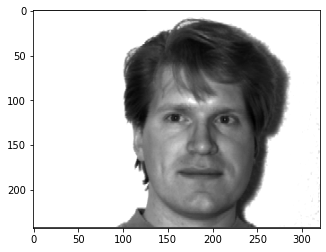

In [0]:
from skimage.io import imread
i = imread(os.path.join(img_path,'subject01.gif'))/255.0
plt.imshow(i,cmap=plt.cm.gray)
plt.show()

In [0]:
i.shape

(243, 320)

In [0]:
np.amin(i),np.amax(i)

(0.03529411764705882, 1.0)

**Computing Average Face**

In [0]:
images = list(os.listdir(img_path))
images.remove('Readme.txt')
len(images)

165

In [0]:
i1 = imread(os.path.join(img_path,images[0]))/255.0
print (i1.shape)
avg_img = np.zeros(i1.shape)
avg_img = avg_img + i1

for file in images[1:]:

    img = imread(os.path.join(img_path,file))/255.0

    avg_img = avg_img + img

n = len(images)
avg_img = avg_img / n
print (np.amin(avg_img),np.amax(avg_img))

(243, 320)
0.1466428995840759 1.0


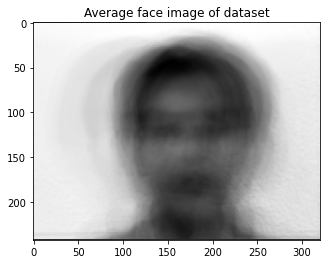

In [0]:
plt.imshow(avg_img,cmap='gray')
plt.title('Average face image of dataset')
plt.show()

In [0]:
np.amin(avg_img),np.amax(avg_img)

(0.1466428995840759, 1.0)

**Calculating deviation of each image from average image**

In [0]:
dev = []
for img in images:
    image = imread(os.path.join(img_path,img))/255.0
    d = image - avg_img

    dev.append(d)

dev = np.array(dev)
print (dev.shape)

(165, 243, 320)


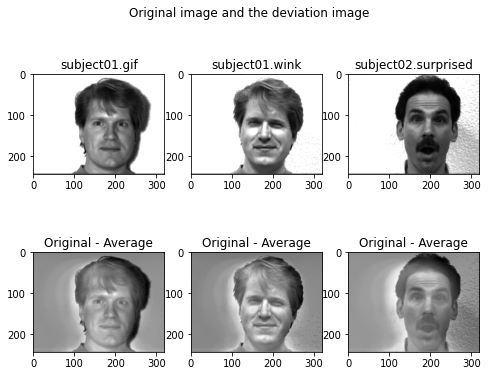

In [0]:

fig,axs = plt.subplots(2,3,figsize = (8,6))
for i in range(3):
  axs[0,i].imshow(imread(os.path.join(img_path,images[10*i]))/255.0,cmap = plt.cm.gray)
  axs[0,i].set_title(images[10*i])
  axs[1,i].imshow(dev[10*i,:,:],cmap=plt.cm.gray)
  axs[1,i].set_title('Original - Average')
plt.suptitle('Original image and the deviation image')
plt.show()


**Flattening the arrays and computing eigen faces**

In [0]:
f = []
for img in dev:
    flattened = img.flatten()

    f.append(flattened)

f = np.array(f)
print (f.shape)


(165, 77760)


In [0]:
C = f @ f.T
print (C.shape)

(165, 165)


In [0]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
index_evalues = [(i,x) for i,x in enumerate(eigenvalues)]
index_evalues.sort(key = lambda x: x[1], reverse = True)

In [0]:
eigenfaces = []
for l in range(eigenvectors.shape[0]):
  vl = eigenvectors[l]
  ul = np.zeros(shape = f.shape[1])
  for k in range(f.shape[0]):
    vlk = vl[k]
    ul = ul + vlk * f[k]
  eigenfaces.append(ul)

eigenfaces = np.array(eigenfaces)
print (eigenfaces.shape)


(165, 77760)


**Displaying the top 6 eigen faces**

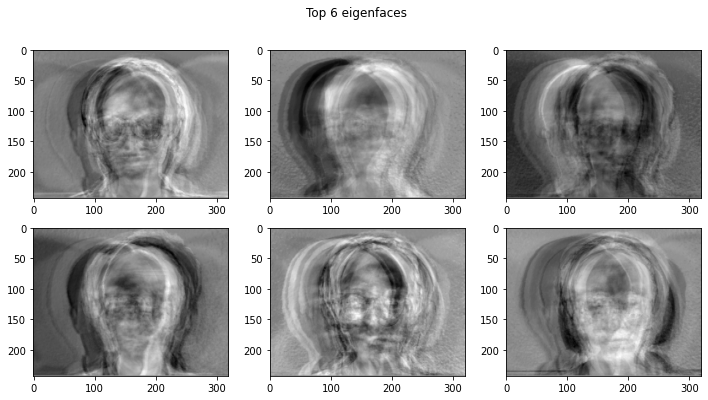

In [0]:
count = 0
fig,axs = plt.subplots(2,3,figsize = (12,6))
for i in range(2):
  for j in range(3):
    k = index_evalues[count][0]
    count+=1
    axs[i,j].imshow(eigenfaces[k].reshape(243,320),cmap='gray')
        
plt.suptitle('Top 6 eigenfaces')
plt.show()

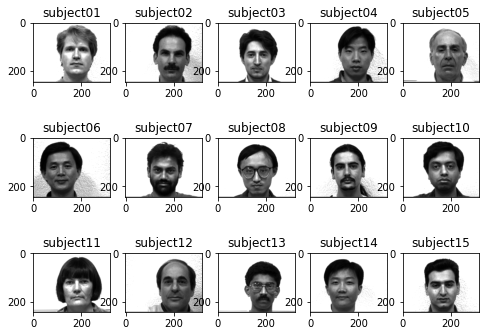

In [0]:
test_images = []
for i in range(1,16):
  if i<10:
    people = 'subject0'+str(i)+'.normal'
  else:
    people = 'subject' + str(i) +'.normal'
  test_images.append(people)

fig,axs = plt.subplots(3,5,figsize = (8,6))
for i in range(3):
  for j in range(5):
    axs[i,j].imshow(imread(os.path.join(img_path,test_images[i*5 +j]))/255.0,cmap = plt.cm.gray)
    axs[i,j].set_title(test_images[i*5+j].split('.')[0])
    
plt.show()

**Taking Top K eigenfaces**

In [0]:
k = 50
top_k = index_evalues[:k]
face_space = []
for i,_ in top_k:
  v = eigenfaces[i]
  v1 = v / np.linalg.norm(v)
  face_space.append(v1)

face_space = np.array(face_space).astype(np.float64)
print (face_space.shape) 

(50, 77760)


**Computing omega k**

In [0]:
labels = ['noglasses','normal']
omega_k = []
for i in range(1,16):
  if i<10:
    people = 'subject0'+str(i)
  else:
    people = 'subject' + str(i)

  p1 = people + '.' + labels[0]
  i1 = imread(os.path.join(img_path,p1))/255.0
  omega_i = np.zeros(i1.shape)
  omega_i = omega_i + i1
  for j in range(1,len(labels)):
    p2 = people + '.' + labels[j]
    i2 = imread(os.path.join(img_path,p2))/255.0
    omega_i = omega_i + i2

  omega_i = omega_i/len(labels)
  omega_i = omega_i.flatten()
  omega_k.append(omega_i)

omega_k = np.array(omega_k)
omega_k = omega_k - (avg_img.flatten())
print (omega_k.shape)

(15, 77760)


**Computing thresholds**

In [0]:
validation_images = []
validation_labels = ['noglasses','happy','sad']
for i in range(1,16):
  if i<10:
    people = 'subject0'+str(i)
  else:
    people = 'subject' + str(i)
  for l in validation_labels:
    validation_images.append(str(people + '.' + l))

print ('Computing thresholds from %d images' %len(validation_images))
  
face_threshold = 0
epsilons = []
epsilonk_thresholds = np.zeros(len(test_images))
for img in validation_images:
  #if img not in test_images:
  label = int(img.split('.')[0][-2:])
  label = label-1
  
  i = imread(os.path.join(img_path,img))/255.0
  phi = i - avg_img
  phi = phi.flatten()
  omega = face_space @ phi.T
  phi_f = np.zeros(face_space[0].shape)

  for j in range(face_space.shape[0]):
    phi_f = phi_f + omega[j]*face_space[j]

  
  for j in range(len(test_images)):
    omega_j = face_space @ omega_k[j].T
    epsilon_k = np.linalg.norm(omega - omega_j)
    if label == j and epsilon_k > epsilonk_thresholds[j]:
      epsilonk_thresholds[j] = epsilon_k
    


    

  epsilon = np.linalg.norm(phi - phi_f)
  epsilons.append(epsilon)
  if epsilon > face_threshold:
    face_threshold = epsilon
    


print (face_threshold)
print (epsilonk_thresholds) 

    


Computing thresholds from 45 images
987.7178604023684
[ 47.65597754  16.36542237  17.71495912  20.74158103  11.71902628
  22.76506308  48.12641348  85.7999065   25.36064853  19.70497714
  65.70075683 131.92731362  23.3063373   37.86739742  87.46899982]


(array([15., 13.,  5.,  3.,  3.,  0.,  3.,  0.,  0.,  3.]),
 array([162.28351426, 244.82694887, 327.37038349, 409.9138181 ,
        492.45725272, 575.00068733, 657.54412195, 740.08755656,
        822.63099117, 905.17442579, 987.7178604 ]),
 <a list of 10 Patch objects>)

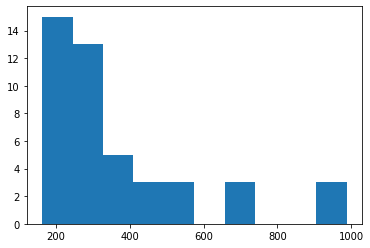

In [0]:
plt.hist(epsilons)

In [0]:
projections = []

In [0]:
for i in range(len(test_images)):
  test_image = imread(os.path.join(img_path,test_images[i]))/255.0
  phi = test_image - avg_img
  phi = phi.flatten()
  omega = face_space @ phi.T
  epsilon_ks = []
  for j in range(len(test_images)):
    omega_j = face_space @ omega_k[j].T
    epsilon_k = np.linalg.norm(omega - omega_j)
    epsilon_ks.append(epsilon_k)

  phi_f = np.zeros(face_space[0].shape)
  
  for j in range(face_space.shape[0]):
    phi_f = phi_f + omega[j]*face_space[j]

  projections.append(phi_f)

  epsilon = np.linalg.norm(phi - phi_f)
  if epsilon < face_threshold:
    #print ('Image is of a face')
    print ('True class: %d' %i)
    possible_candidates = []
    min_ek = face_threshold
    min_ek_c = -1
    for k,ek in enumerate(epsilon_ks):
      if ek < epsilonk_thresholds[k]:
        possible_candidates.append(k)
        if ek < min_ek:
          min_ek = ek
          min_ek_c = k
        
        
      
    
    print ('Distance from face_space = %f' %epsilon)
    print ('Distance from each class label:')
    print (epsilon_ks)
    
    if len(possible_candidates)==0:
      print ('Predicted class :%s' %'UNKNOWN')
    else:
      #print ('Possible candidates:')
      #print (possible_candidates)
      print ('Predicted class =%d' %min_ek_c)
      #print ('Predicted class: %d' %(np.argmin(np.array(epsilon_ks))))

  else:
    print ('Image does not have a face')


True class: 0
Distance from face_space = 213.875543
Distance from each class label:
[34.851852945015814, 138.35510043921107, 159.61550897322883, 113.09472251238105, 76.11212657530623, 377.6566023405487, 162.29600983366547, 146.60848284820537, 165.4927381962265, 118.14539196833549, 125.72860509344099, 160.20474784833536, 102.44885654107293, 283.907937026365, 147.98580740348805]
Predicted class =0
True class: 1
Distance from face_space = 503.199559
Distance from each class label:
[114.93524931835066, 0.0, 270.8675512089248, 75.87101868832944, 128.17306028994344, 458.1150886074627, 263.15566706552124, 253.5586158761299, 274.0760894231526, 206.23876550658503, 138.64332092752323, 94.33038553565237, 156.12274661263285, 386.8004157529855, 255.82360338637716]
Predicted class =1
True class: 2
Distance from face_space = 310.651712
Distance from each class label:
[179.45859995096853, 270.8675512089248, 0.0, 232.99880625296288, 188.0465759078906, 327.26530935158064, 46.36453353088518, 49.258138335

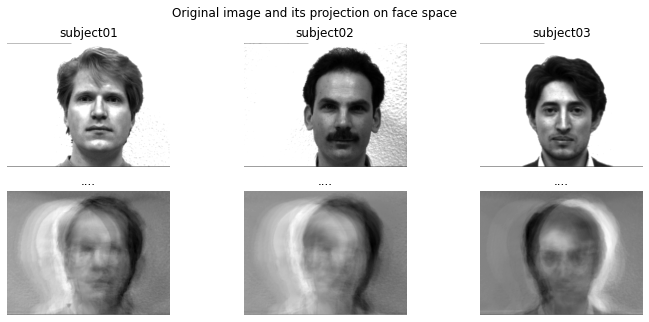

In [0]:
fig,axs = plt.subplots(2,3,figsize = (12,5))
for i in range(3):

  axs[0,i].imshow(imread(os.path.join(img_path,test_images[i]))/255.0,cmap = plt.cm.gray)
  axs[0,i].set_title(test_images[i].split('.')[0])
  axs[0,i].axis('off')

  axs[1,i].imshow(projections[i].reshape(243,320),cmap='gray')
  #axs[1,i].set_title('Projection on face_space')
  axs[1,i].axis('off')
  axs[1,i].set_title('....')

plt.suptitle('Original image and its projection on face space')
plt.show()

**Testing on some other images**

In [0]:
from skimage.transform import resize
new_test_images_path = os.path.join(data_path,'data','new_test_images')
test_image = resize(imread(os.path.join(new_test_images_path,'cat.jpg'),as_gray = True),(243,320))
print (test_image.shape)
print (np.min(test_image),np.max(test_image))

(243, 320)
0.011117349902431267 0.9998547865794116


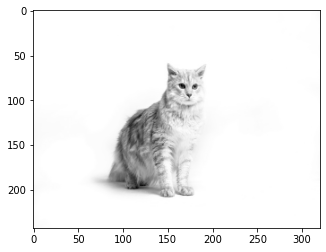

In [0]:
plt.imshow(test_image,cmap='gray')

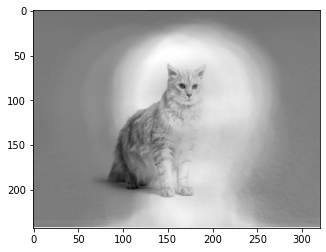

In [0]:
test_image_minus_avg = test_image - avg_img
plt.imshow(test_image_minus_avg,cmap='gray')
plt.show()

In [0]:
def test(test_image,has_face = True):
  if not has_face:
    phi = test_image
  else:
    phi = test_image - avg_img 

  phi = phi.flatten()
  omega = face_space @ phi.T
  phi_f = np.zeros(face_space[0].shape)

  for j in range(face_space.shape[0]):
    phi_f = phi_f + omega[j]*face_space[j]

  
  epsilon = np.linalg.norm(phi - phi_f)
  
  print ('\nDistance from face space =%f' %epsilon)
  
  if (epsilon < face_threshold):
    
  

    epsilon_ks = []
    for j in range(len(test_images)):
      omega_j = face_space @ omega_k[j].T
      epsilon_k = np.linalg.norm(omega - omega_j)
      epsilon_ks.append(epsilon_k)
      
    c = []
    min_ek = face_threshold
    min_ek_c = -1
    for k,ek in enumerate(epsilon_ks):
      if ek < epsilonk_thresholds[k]:
        c.append(k)
        if ek < min_ek:
          min_ek = ek
          min_ek_c = k
        

    if c==[]:
      print ('\nUnknown image')
      print ('Projection distances to classes')
      print (epsilon_ks)
      print ('Epsilon k thresholds')
      print (epsilonk_thresholds)
    else:
      print ('\nPossible candidates:')
      print (c)
      print ('Projection distances to classes')
      print (epsilon_ks)
      print ('Epsilon k thresholds')
      print (epsilonk_thresholds)
      print ('\nPredicted class = %s' %min_ek_c)
  else:
    print ('\nImage does not contain a human face')

In [0]:
test(test_image,False)


Distance from face space =1368.245654

Image does not contain a human face


(243, 320)
0.01851394723654322 0.9999999999999999


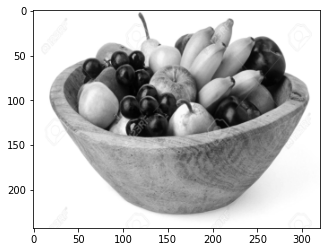

In [0]:
test_image = resize(imread(os.path.join(new_test_images_path,'basket.jpg'),as_gray = True),(243,320))
print (test_image.shape)
print (np.min(test_image),np.max(test_image))
plt.imshow(test_image,cmap='gray')
plt.show()

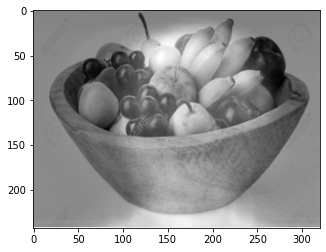

In [0]:
test_image_minus_avg = test_image - avg_img
plt.imshow(test_image_minus_avg,cmap='gray')
plt.show()

In [0]:
test(test_image,False)


Distance from face space =1106.098663

Image does not contain a human face


(243, 320)
0.0 0.984313725490196


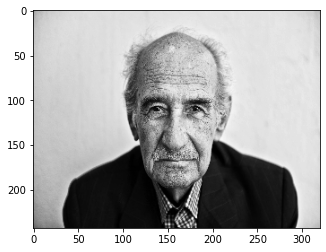

In [0]:
test_image = cv2.resize(cv2.imread(os.path.join(new_test_images_path,'old_man.jpg'),0),(320,243))/255.0
print (test_image.shape)
print (np.min(test_image),np.max(test_image))
plt.imshow(test_image,cmap='gray')
plt.show()

In [0]:
test(test_image)


Distance from face space =346.144678

Unknown image
Projection distances to classes
[209.06854532899675, 255.22003258481163, 223.1963491989542, 235.4049879429813, 208.90871360284774, 229.81784582423145, 212.67019231628038, 198.50485103602747, 191.56006290627803, 197.84434354416283, 201.54068039724947, 239.03667630192504, 228.90930534379305, 216.98836533984158, 196.25115752881194]
Epsilon k thresholds
[ 47.65597754  16.36542237  17.71495912  20.74158103  11.71902628
  22.76506308  48.12641348  85.7999065   25.36064853  19.70497714
  65.70075683 131.92731362  23.3063373   37.86739742  87.46899982]


(243, 320)
0.0 1.0


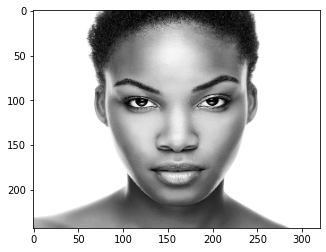

In [0]:
test_image = cv2.resize(cv2.imread(os.path.join(new_test_images_path,'lady.jpg'),0),(320,243))/255.0
print (test_image.shape)
print (np.min(test_image),np.max(test_image))
plt.imshow(test_image,cmap='gray')
plt.show()

In [0]:
test(test_image)


Distance from face space =259.077776

Unknown image
Projection distances to classes
[155.01042859737458, 244.68975965912378, 130.93654297882637, 214.22014655542426, 166.05549494471578, 248.50845672643052, 132.76700998223697, 107.73892988004683, 96.8237541477385, 135.2119390666802, 200.50532087172667, 247.02226027716011, 177.03488734820849, 167.8954947596839, 100.50305105863784]
Epsilon k thresholds
[ 47.65597754  16.36542237  17.71495912  20.74158103  11.71902628
  22.76506308  48.12641348  85.7999065   25.36064853  19.70497714
  65.70075683 131.92731362  23.3063373   37.86739742  87.46899982]


(243, 320)
0.0 0.9921568627450981


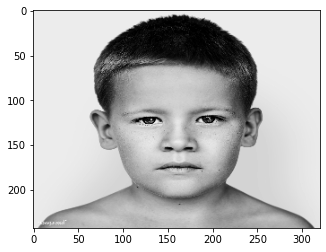

In [0]:
test_image = cv2.resize(cv2.imread(os.path.join(new_test_images_path,'boy.jpg'),0),(320,243))/255.0
print (test_image.shape)
print (np.min(test_image),np.max(test_image))
plt.imshow(test_image,cmap='gray')
plt.show()

In [0]:
test(test_image)


Distance from face space =173.546464

Unknown image
Projection distances to classes
[142.81138163443805, 215.21641314206244, 156.4074322054705, 188.47883639950882, 165.75108726146115, 264.2321315050577, 154.54417220275292, 130.12822188404442, 138.59530967551902, 129.98500444015102, 162.34008400158595, 213.92519012443927, 176.5049843870569, 199.19257852985248, 122.35524435699548]
Epsilon k thresholds
[ 47.65597754  16.36542237  17.71495912  20.74158103  11.71902628
  22.76506308  48.12641348  85.7999065   25.36064853  19.70497714
  65.70075683 131.92731362  23.3063373   37.86739742  87.46899982]
